

# Project: Investigate a Dataset - [Medical Appointments No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project I have investigated a dataset of appoinment records for Brasil public hospitals. The data includes some attributes of patients and state if the patients showed up to appointments. The analysis is focused on finding trends influencing patients to show or not show up to appointments.


### Question(s) for Analysis
1 - what is the overall appointment show-up vs. no show-up rate
2 - what are the most feature that matter the most of ('Age', 'being alcoholic','Having an SMS', 'Gender', 'Scholarship'), to make the patient make it to his appiontment

In [1]:

#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling



In [3]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The ouput shows that there are 110,527 entries described by 14 fields

count the number of unique patient and appointment IDs

In [4]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.loc[:, ['PatientId', 'AppointmentID']].nunique()

PatientId         62299
AppointmentID    110527
dtype: int64

The results confirm that there are as many unique AppointmentIDs ,
also less PatientIds than records

In [6]:
df.set_index('AppointmentID', inplace=True ,verify_integrity=True)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 5642903 to 5629448
Data columns (total 13 columns):
PatientId         110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 11.8+ MB


age:
The patients are 37 years on average.
25% of patients are below 18 and most of them are below 55.
There is a data range problem in the dataset. The age value cannot be below 0, and there are some very old people as well. 

sms_received: 
75% of patients received sms regarding an appointment.
awaiting_time_days:
10 days on average patients waited for an appointment. 
50% of patients waited up to 4 days and 75% up to 15 days for an appointment.
The longest awaiting time was 179 days. 
There is at least one case where a visit happened 6 days before it was scheduled. 
This should not happen and will be further investigated


### Data Cleaning
The output also exposed outliers in the Age field that could potentially be errors. The youngest person is -1 and the oldest is 115

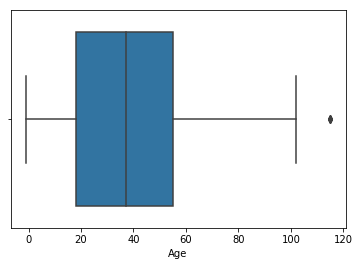

In [8]:
sns.boxplot(df.Age)
plt.show()

The boxplot confirms that there are no values below zero but  identifiedoutliers at the high end of the range. so should To explore further these records 

In [9]:
df[df.Age < 0] 

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5775010,4.659432e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Only one record was found. The entry appears to be an error

In [10]:
df[df.Age > 100] 

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5651757,9.762948e+14,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
5700278,3.196321e+13,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
5700279,3.196321e+13,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
5562812,3.196321e+13,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
5744037,3.196321e+13,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
5751563,2.342836e+11,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
5717451,7.482346e+14,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


There are two patients who were allegedly 115 years old,Removing these entries along with the -1 patient will ensure that they don't cause any outlier affects.
There are also two patients reported to be 102.

The following cell will remove the records with outlier ages.

In [11]:
df = df[(df.Age > -1) & (df.Age < 115)]

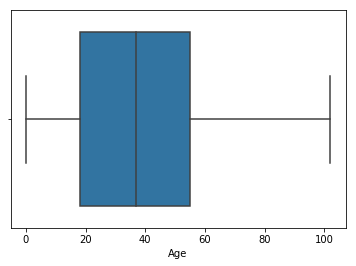

In [12]:
sns.boxplot(df.Age)
plt.show()

The outliers are no longer present in the boxplot.

To make the dataset easy to work with some of the fields need to be converted to new data types.
1- No-Show field will be easier to work with as a binary value.
2- SheduledDay and AppointmentDay fields should be datetime objects.

The last step of data cleaning will be to add a binary field for no shows. This will make calculating total and average numbers of no shows easier in analysis

In [18]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [19]:
# converting some columns that has date to a datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [20]:
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# create a mask for people who came
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

In [36]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,showed,not_showed
AppointmentID,,,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
5642503,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False
5642549,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,False
5642828,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False
5642494,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False


<a id='eda'></a>
## Exploratory Data Analysis






### Research Question 1 (what is the overall appointment show-up vs. no show-up rate)

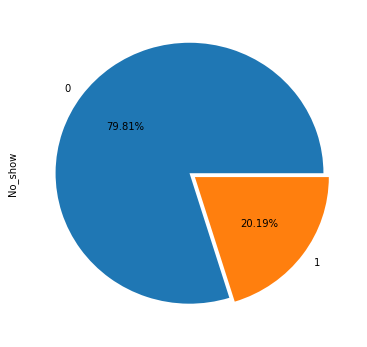

In [34]:
df.No_show.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show() 

### Research Question 2  (what are the most feature that matter the most of ('Age', 'being alcoholic','Having an SMS', 'Gender', 'Scholarship'), to make the patient make it to his appiontment?)

In [26]:
df.head()


,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,showed,not_showed
AppointmentID,,,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
5642503,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False
5642549,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,False
5642828,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False
5642494,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False


In [27]:
df.Age[showed].mean()

37.7887534720254

In [28]:
df.Age[not_showed].mean()

34.30682021867718

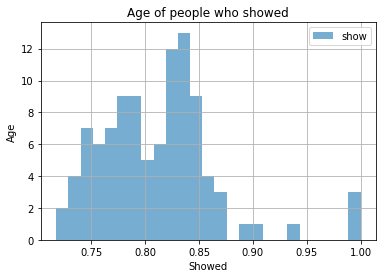

In [29]:
df.groupby('Age')['showed'].mean().hist(alpha=0.6,bins=25,label='show');
plt.xlabel("Showed")
plt.ylabel("Age")
plt.title("Age of people who showed")
plt.legend()


making an histogram to see the realtion between the (age,alcoholic people, SMS recievers, Gender, Scholarship) and the people who came to thier appointment

SMS_received
0    0.832996
1    0.724247
Name: showed, dtype: float64


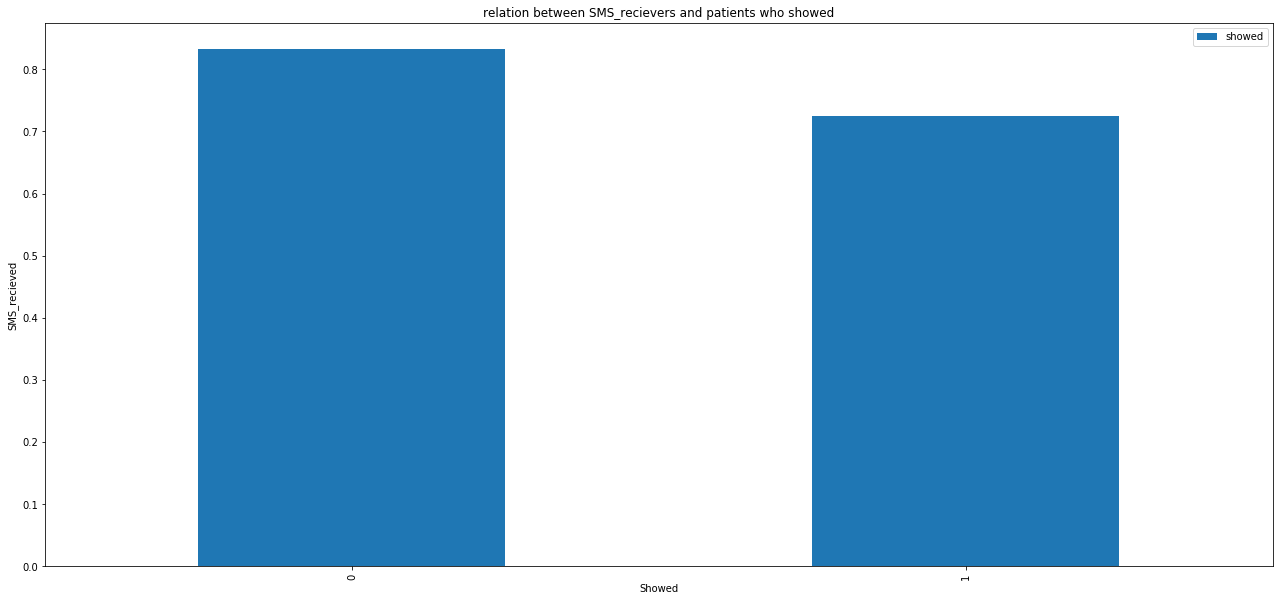

In [30]:
print(df.groupby('SMS_received')['showed'].mean())
df.groupby('SMS_received')['showed'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed")
plt.ylabel("SMS_recieved")
plt.title("relation between SMS_recievers and patients who showed")
plt.legend()

Alcoholism
0    0.798070
1    0.798512
Name: showed, dtype: float64


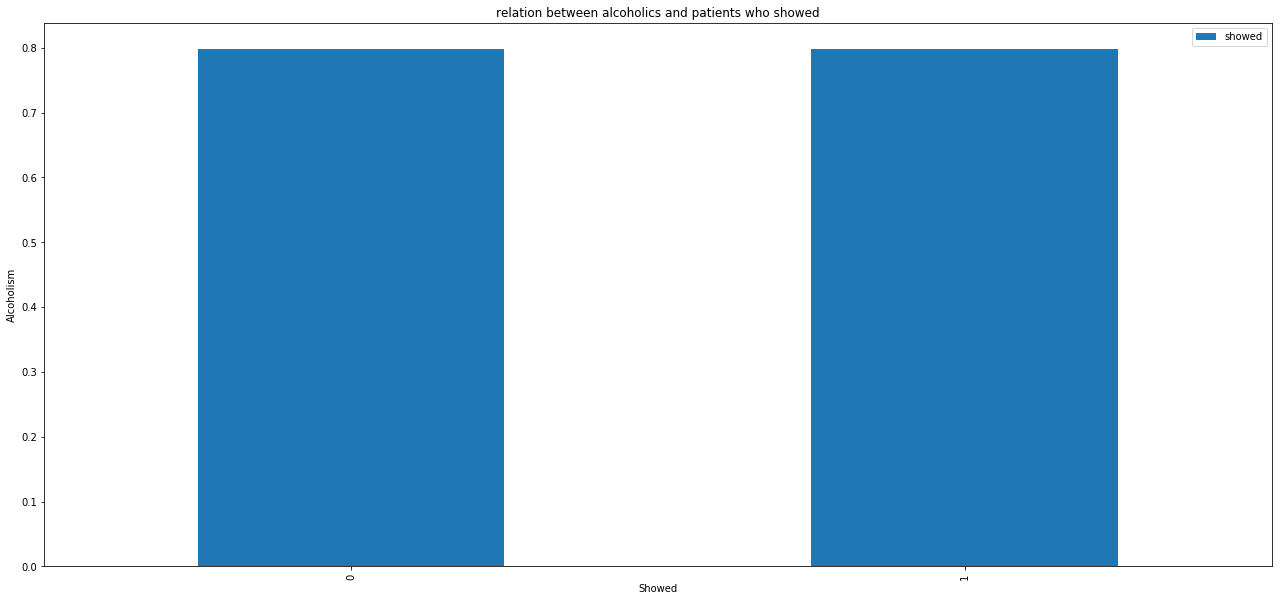

In [31]:
print(df.groupby('Alcoholism')['showed'].mean())
df.groupby('Alcoholism')['showed'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed")
plt.ylabel("Alcoholism")
plt.title("relation between alcoholics and patients who showed")
plt.legend()

Gender
F    0.796879
M    0.800321
Name: showed, dtype: float64


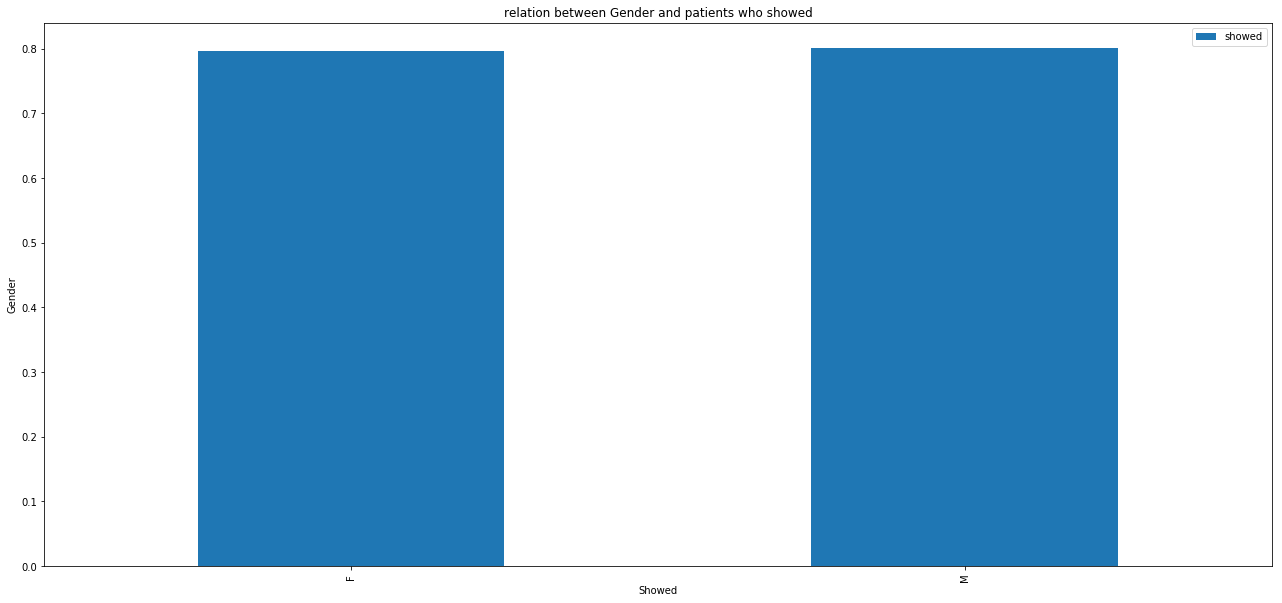

In [32]:
print(df.groupby('Gender')['showed'].mean())
df.groupby('Gender')['showed'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed")
plt.ylabel("Gender")
plt.title("relation between Gender and patients who showed")
plt.legend()

Scholarship
0    0.801947
1    0.762637
Name: showed, dtype: float64


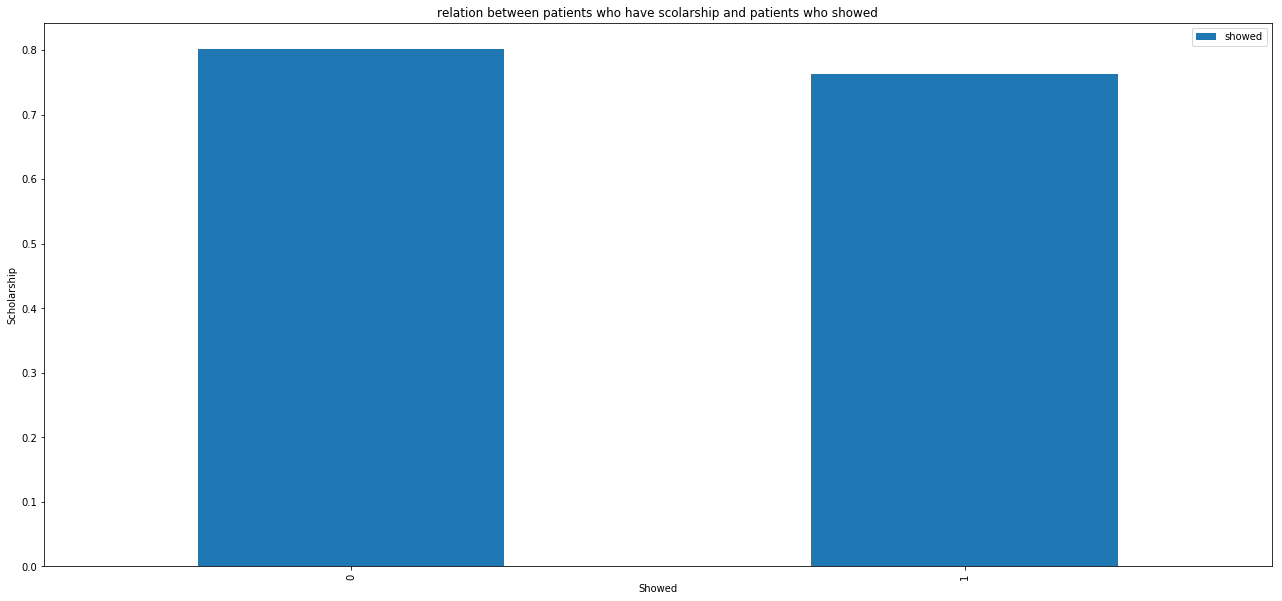

In [33]:
print(df.groupby('Scholarship')['showed'].mean())
df.groupby('Scholarship')['showed'].mean().plot(kind = 'bar',figsize=(22,10))
plt.xlabel("Showed")
plt.ylabel("Scholarship")
plt.title("relation between patients who have scolarship and patients who showed")
plt.legend()

<a id='conclusions'></a>
## Conclusions



1- The average of age for people who will be most likely to show up is 38 , and the average age for people who are not likely to show up is 34.


2-  the features such as different gender or alcoholic is not a factor to decide if the person would come to his appointment or not

3- As we can see sending an SMS for the appiontment is not neccessary the right option to make sure that the patient will come

4-  As we can see in our investigation the Age is the most important factor that decided if a patient would come or not


### Limitations
there we some illogical data such as patients with age 0 or less

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])